In [44]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

sys.path.append(os.path.abspath(r"C:\Users\shailaja.akella\Documents\Github\dynamic_routing_analysis\src"))
sys.path.append(os.path.abspath(r"C:\Users\shailaja.akella\Documents\Github\dynamic_routing_analysis\src\dynamic_routing_analysis"))

from collections.abc import Iterable, Mapping
from typing import Any, Literal

import ccf_utils
import numpy.typing as npt
import plot_utils as pu




In [62]:
import numpy as np

In [48]:
df = pd.read_pickle(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\results\df_ortho_quiescent.pkl")

df.head(5)

,r2_fullmodel_O,unit_id,session_id,areas,av_dprime,r2_context_O,r2_fullmodel,r2_context,drop_score_O,drop_score
0,0.003233,626791_2022-08-15_C-113,626791_2022-08-15,AUDp,1.704476,0.002144,0.003287,0.002720,0.000000,0.000000
1,0.043607,626791_2022-08-15_C-123,626791_2022-08-15,AUDp,1.704476,0.039680,0.043640,0.041311,0.090047,0.053383
2,0.019486,626791_2022-08-15_C-98,626791_2022-08-15,AUDp,1.704476,0.018692,0.019711,0.019377,0.040767,0.016929
3,-0.000378,626791_2022-08-15_C-119,626791_2022-08-15,AUDp,1.704476,-0.000527,-0.000311,-0.000726,0.000000,0.000000
4,0.034344,626791_2022-08-15_C-467,626791_2022-08-15,AUDp,1.704476,0.033295,0.034367,0.034284,0.030528,0.002423


In [49]:

def plot_brain_heatmap( 
    regions: Iterable[str] | npt.ArrayLike,
    values: Iterable[float] | npt.ArrayLike,
    projection: str = 'saggital',
    coord: float | None = None,
    cmap: str = "viridis",
    clevels: tuple[float, float] | None = None,
    patch_params: Mapping[str, Any] = {},
    missing_params: Mapping[str, Any] = {},
    plane_line_params: Mapping[str, Any] = {},
    fig: matplotlib.figure.Figure | None = None,
    ):
    
    missing_kwds = (
        {"color": "lightgrey"}
        | {k: v for k, v in patch_params.items() if k in ("edgecolor", "linewidth")}
        | missing_params
    )

    vol = ccf_utils.get_ccf_volume(True, True)
    max_ap = vol.shape[2] * ccf_utils.RESOLUTION_UM
    max_dv = vol.shape[1] * ccf_utils.RESOLUTION_UM
    max_ml = vol.shape[0] * ccf_utils.RESOLUTION_UM

    height_top = max_ap
    height_sagittal = max_dv

    gs = matplotlib.gridspec.GridSpec(
        3,
        1,
        figure=fig,
        height_ratios=[height_top / height_sagittal]
        + [1]
        + [0.1],
    )

    
    ax = fig.add_subplot(gs[0, 0])

    norm = matplotlib.colors.Normalize(vmin=clevels[0], vmax=clevels[1])
    gdf = pu.get_heatmap_gdf(
        regions=regions,
        values=values,
        projection=projection,
        position=coord,
    )
    gdf.plot(
        column="value",
        cmap=cmap,
        missing_kwds=missing_kwds,
        ax=ax,
        norm=norm,
        **patch_params,
    )
    ax.set_xlim(0, max_ap)
    ax.set_ylim(0, max_dv)
    ax.invert_yaxis()
    
    axlinefunc = ax.axhline
    axlinefunc(
        coord, **{"color": "k", "linestyle": "--", "lw": 0.1} | plane_line_params
    )

    ax.set_xlim(0, max_ap)
    ax.set_ylim(0, max_ml)

    ax_cbar = fig.add_subplot(gs[1, 0])

    fig.colorbar(
        matplotlib.cm.ScalarMappable(
            norm=matplotlib.colors.Normalize(*clevels),
            cmap=cmap,
        ),
        ax=ax_cbar,
        fraction=0.5,
        orientation="horizontal",
        location="bottom",
    )

    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_clip_on(False)
        
    return ax

 'fiber tracts' 'root']


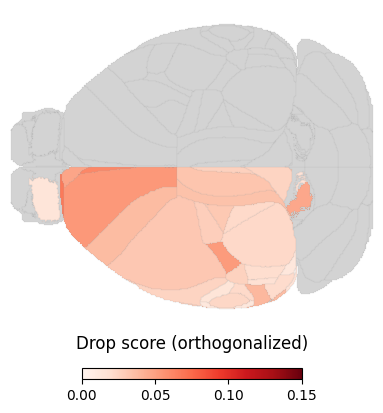

In [50]:
df_area = df.groupby('areas')['drop_score_O'].mean()

pu.plot_brain_heatmap(values=df_area.values, 
                   regions=df_area.index,
                   cmap = 'Reds',
                   clevels = (0, 0.15));
plt.title('Drop score (orthogonalized)')
plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_ortho.png", dpi=300)

 'fiber tracts' 'root']


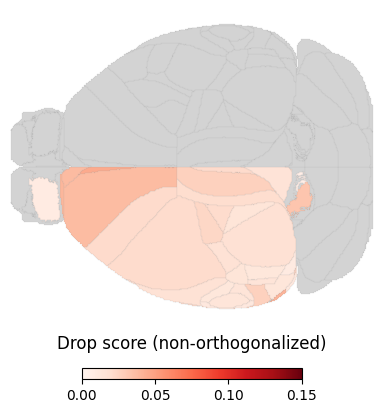

In [52]:
df_area = df.groupby('areas')['drop_score'].mean()

pu.plot_brain_heatmap(values=df_area.values, 
                   regions=df_area.index,
                   cmap = 'Reds',
                   clevels = (0, 0.15));
plt.title('Drop score (non-orthogonalized)')
plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_no_ortho.png", dpi=300)

In [53]:
from iblatlas.atlas import BrainRegions
br = BrainRegions()
br.acronym

array(['void', 'root', 'grey', ..., 'pfs', 'IPF', 'retina'], dtype=object)

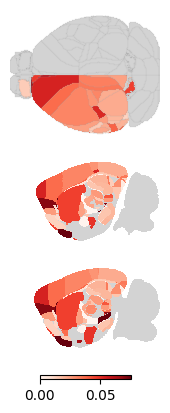

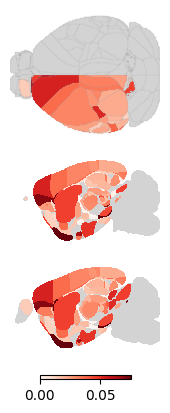

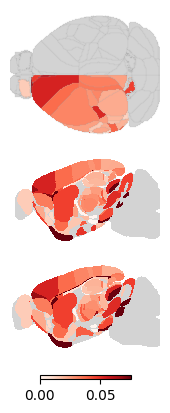

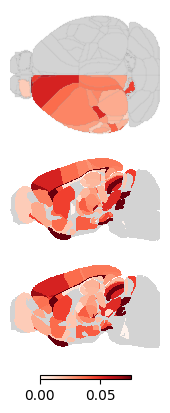

In [127]:
#barplot sorted by DR diff from median


df_area = df.groupby('areas')['drop_score_O'].mean()
unique_areas = df_area.index
excl_areas=["CTXpl","OLF","HPF","CTXsp","STR","PAL","TH","HY","MB","HB","P","MY","CB","VL","SEZ",]
unique_areas = [area for area in unique_areas if area not in excl_areas]
values = df_area[unique_areas].values

fig=pu.plot_brain_heatmap(regions=unique_areas,
                              values=values,
                              sagittal_planes= [-3200, -3400],
                              clevels=(0,0.075), cmap = 'Reds')

plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_ortho_3200.png", dpi=300)

fig=pu.plot_brain_heatmap(regions=unique_areas,
                              values=values,
                              sagittal_planes= [-3600, -3800],
                              clevels=(0,0.075), cmap = 'Reds')


plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_ortho_3600.png", dpi=300)

fig=pu.plot_brain_heatmap(regions=unique_areas,
                              values=values,
                              sagittal_planes= [-4000, -4200],
                              clevels=(0,0.075), cmap = 'Reds')


plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_ortho_4000.png", dpi=300)


fig=pu.plot_brain_heatmap(regions=unique_areas,
                              values=values,
                              sagittal_planes= [-4400, -4600],
                              clevels=(0,0.075), cmap = 'Reds')


plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_ortho_4400.png", dpi=300)

